In [5]:
pip install -U airportsdata

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [84]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
import warnings
# Import of relevant packages
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

#import psycopg2

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, recall_score, precision_score, r2_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

# Set random seed 
RSEED = 42
warnings.filterwarnings("ignore")

In [9]:
df = pd.read_csv('data/SampleSubmission.csv')
df

,ID,target
0,test_id_0,2470
1,test_id_1,2944
2,test_id_2,2585
3,test_id_3,3264
4,test_id_4,1369
...,...,...
9328,test_id_9328,2155
9329,test_id_9329,3444
9330,test_id_9330,921
9331,test_id_9331,130


In [10]:
df1=pd.read_csv('data/Train.csv')
df1

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0
...,...,...,...,...,...,...,...,...,...,...
107828,train_id_107828,2018-07-05,WKL 0000,TUN,TUN,2018-07-05 23:00:00,2018-07-06 02.00.00,SCH,TU 32AIML,0.0
107829,train_id_107829,2018-01-13,UG 0003,DJE,TUN,2018-01-13 08:00:00,2018-01-13 09.00.00,SCH,UG AT7AT7,0.0
107830,train_id_107830,2018-11-07,SGT 0000,TUN,TUN,2018-11-07 05:00:00,2018-11-07 12.50.00,SCH,TU 736IOK,0.0
107831,train_id_107831,2018-01-23,UG 0010,TUN,DJE,2018-01-23 18:00:00,2018-01-23 18.45.00,ATA,TU CR9ISA,0.0


In [11]:
df1.nunique()

ID        107833
DATOP       1011
FLTID       1861
DEPSTN       132
ARRSTN       128
STD        81697
STA        85136
STATUS         5
AC            68
target       968
dtype: int64

In [12]:
df2=pd.read_csv('data/Test.csv')
df2

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC
0,test_id_0,2016-05-04,TU 0700,DJE,TUN,2016-05-04 06:40:00,2016-05-04 07.30.00,ATA,TU 32AIMF
1,test_id_1,2016-05-05,TU 0395,TUN,BKO,2016-05-05 15:20:00,2016-05-05 20.05.00,ATA,TU 320IMW
2,test_id_2,2016-05-06,TU 0745,FRA,TUN,2016-05-06 10:00:00,2016-05-06 12.25.00,ATA,TU 32AIMC
3,test_id_3,2016-05-11,TU 0848,BEY,TUN,2016-05-11 09:40:00,2016-05-11 13.10.00,ATA,TU 31BIMO
4,test_id_4,2016-05-11,TU 0635,ORY,MIR,2016-05-11 09:50:00,2016-05-11 12.35.00,ATA,TU 736IOQ
...,...,...,...,...,...,...,...,...,...
9328,test_id_9328,2018-09-12,TU 0998,TUN,NCE,2018-09-12 14:15:00,2018-09-12 15.45.00,ATA,TU 320IMV
9329,test_id_9329,2018-09-27,WKL 0000,TUN,TUN,2018-09-27 22:00:00,2018-09-28 01.00.00,SCH,TU 32AIMG
9330,test_id_9330,2018-09-03,UG 1601,SJJ,TUN,2018-09-03 09:20:00,2018-09-03 11.10.00,SCH,TU CR9ISA
9331,test_id_9331,2018-09-15,UG 0008,TUN,DJE,2018-09-15 14:30:00,2018-09-15 15.30.00,SCH,UG AT7LBD


| DATOP          | FLTID         | DEPSTN        | ARRSTN        | STD                   | STA                   | STATUS        | ETD                   | ETA                   | ATD                   |
|----------------|---------------|---------------|---------------|-----------------------|-----------------------|---------------|-----------------------|-----------------------|-----------------------|
| Date of flight | Flight number | Departure point| Arrival point | Scheduled Time departure | Scheduled Time arrival | Flight status | Expected Time departure | Expected Time arrival | Actual Time of Departure |

| ATA            | DELAY1        | DUR1          | DELAY2        | DUR2                  | DELAY3                | DUR3          | DELAY4                | DUR4                  | AC                    |
|----------------|---------------|---------------|---------------|-----------------------|-----------------------|---------------|-----------------------|-----------------------|-----------------------|
| Actual Time of arrival | Delay code 1 | Delay time 1 | Delay code 2 | Delay time 2 | Delay code 3 | Delay time 3 | Delay code 4 | Delay time 4 | Aircraft Code |


In [13]:
df1 = pd.read_csv('data/Train.csv')
df1

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0
...,...,...,...,...,...,...,...,...,...,...
107828,train_id_107828,2018-07-05,WKL 0000,TUN,TUN,2018-07-05 23:00:00,2018-07-06 02.00.00,SCH,TU 32AIML,0.0
107829,train_id_107829,2018-01-13,UG 0003,DJE,TUN,2018-01-13 08:00:00,2018-01-13 09.00.00,SCH,UG AT7AT7,0.0
107830,train_id_107830,2018-11-07,SGT 0000,TUN,TUN,2018-11-07 05:00:00,2018-11-07 12.50.00,SCH,TU 736IOK,0.0
107831,train_id_107831,2018-01-23,UG 0010,TUN,DJE,2018-01-23 18:00:00,2018-01-23 18.45.00,ATA,TU CR9ISA,0.0


In [18]:
df2 = pd.read_csv('data/Test.csv')
df2

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC
0,test_id_0,2016-05-04,TU 0700,DJE,TUN,2016-05-04 06:40:00,2016-05-04 07.30.00,ATA,TU 32AIMF
1,test_id_1,2016-05-05,TU 0395,TUN,BKO,2016-05-05 15:20:00,2016-05-05 20.05.00,ATA,TU 320IMW
2,test_id_2,2016-05-06,TU 0745,FRA,TUN,2016-05-06 10:00:00,2016-05-06 12.25.00,ATA,TU 32AIMC
3,test_id_3,2016-05-11,TU 0848,BEY,TUN,2016-05-11 09:40:00,2016-05-11 13.10.00,ATA,TU 31BIMO
4,test_id_4,2016-05-11,TU 0635,ORY,MIR,2016-05-11 09:50:00,2016-05-11 12.35.00,ATA,TU 736IOQ
...,...,...,...,...,...,...,...,...,...
9328,test_id_9328,2018-09-12,TU 0998,TUN,NCE,2018-09-12 14:15:00,2018-09-12 15.45.00,ATA,TU 320IMV
9329,test_id_9329,2018-09-27,WKL 0000,TUN,TUN,2018-09-27 22:00:00,2018-09-28 01.00.00,SCH,TU 32AIMG
9330,test_id_9330,2018-09-03,UG 1601,SJJ,TUN,2018-09-03 09:20:00,2018-09-03 11.10.00,SCH,TU CR9ISA
9331,test_id_9331,2018-09-15,UG 0008,TUN,DJE,2018-09-15 14:30:00,2018-09-15 15.30.00,SCH,UG AT7LBD


In [19]:
df.info

<bound method DataFrame.info of                 ID  target
0        test_id_0    2470
1        test_id_1    2944
2        test_id_2    2585
3        test_id_3    3264
4        test_id_4    1369
...            ...     ...
9328  test_id_9328    2155
9329  test_id_9329    3444
9330  test_id_9330     921
9331  test_id_9331     130
9332  test_id_9332    2857

[9333 rows x 2 columns]>

In [20]:
df.describe()

,target
count,9333.000000
mean,1736.976963
std,992.326171
min,0.000000
25%,877.000000
50%,1750.000000
75%,2588.000000
max,3450.000000


In [23]:
import airportsdata
airports = airportsdata.load()  # key is the ICAO identifier (the default
df_air= pd.DataFrame(airports)
df_air.head(20)

,00AA,00AK,00AL,00AN,00AR,00AS,00CA,00CL,00FA,00FL,...,ZYQQ,ZYTH,ZYTL,ZYTN,ZYTX,ZYXC,ZYYJ,ZYYY,_AYM,_OUK
icao,00AA,00AK,00AL,00AN,00AR,00AS,00CA,00CL,00FA,00FL,...,ZYQQ,ZYTH,ZYTL,ZYTN,ZYTX,ZYXC,ZYYJ,ZYYY,_AYM,_OUK
iata,,,,,,,,,,,...,NDG,,DLC,TNH,SHE,XEN,YNJ,,AYM,OUK
name,Aero B Ranch Airport,Lowell Field,Epps Airpark,Katmai Lodge Airport,Arland Airport,Fulton Airport,Goldstone /Gts/ Airport,Williams Ag Airport,Grass Patch Airport,River Oak Airport,...,Qiqihar Sanjiazi Airport,Tahe Airport,Zhoushuizi Airport,Tonghua Sanyuanpu Airport,Taoxian Airport,Xingcheng Air Base,Yanji Chaoyangchuan Airport,Shenyang Dongta Airport,Yas Island Seaplane Base,Out Skerries Airstrip
city,Leoti,Anchor Point,Harvest,King Salmon,Bennington,Alex,Barstow,Biggs,Bushnell,Okeechobee,...,Qiqihar,Tahe,Dalian,Tonghua,Shenyang,,Yanji,Shenyang,Yas Island,Shetland
subd,Kansas,Alaska,Alabama,Alaska,Kansas,Oklahoma,California,California,Florida,Florida,...,Heilongjiang,Heilongjiang,Liaoning,Jilin,Liaoning,Liaoning,Jilin,Liaoning,Abu Dhabi,Scotland
country,US,US,US,US,US,US,US,US,US,US,...,CN,CN,CN,CN,CN,CN,CN,CN,AE,GB
elevation,3435.0,252.0,820.0,80.0,1352.0,1100.0,3038.0,87.0,53.0,35.0,...,477.0,1240.0,107.0,1200.0,198.0,30.0,624.0,0.0,0.0,20.0
lat,38.704022,59.948889,34.86481,59.093472,38.969651,34.942803,35.354972,39.427189,28.645547,27.23088,...,47.239601,52.224444,38.965698,42.253889,41.639801,40.580299,42.882801,41.784401,24.467,60.425583
lon,-101.473911,-151.692222,-86.770278,-156.455833,-97.601557,-97.818019,-116.885208,-121.763428,-82.218975,-80.969231,...,123.917999,124.720222,121.539001,125.703333,123.483002,120.697998,129.451004,123.496002,54.6103,-0.7466
tz,America/Chicago,America/Anchorage,America/Chicago,America/Anchorage,America/Chicago,America/Chicago,America/Los_Angeles,America/Los_Angeles,America/New_York,America/New_York,...,Asia/Shanghai,Asia/Shanghai,Asia/Shanghai,Asia/Shanghai,Asia/Shanghai,Asia/Shanghai,Asia/Shanghai,Asia/Shanghai,Asia/Dubai,Europe/London


In [24]:
# Transpose the DataFrame
df_air_transs = df_air.transpose()

# If you want to reset the index of the transposed DataFrame
df_air_transs.reset_index(drop=True, inplace=True)
df_air_transs

,icao,iata,name,city,subd,country,elevation,lat,lon,tz,lid
0,00AA,,Aero B Ranch Airport,Leoti,Kansas,US,3435.0,38.704022,-101.473911,America/Chicago,00AA
1,00AK,,Lowell Field,Anchor Point,Alaska,US,252.0,59.948889,-151.692222,America/Anchorage,00AK
2,00AL,,Epps Airpark,Harvest,Alabama,US,820.0,34.86481,-86.770278,America/Chicago,00AL
3,00AN,,Katmai Lodge Airport,King Salmon,Alaska,US,80.0,59.093472,-156.455833,America/Anchorage,00AN
4,00AR,,Arland Airport,Bennington,Kansas,US,1352.0,38.969651,-97.601557,America/Chicago,00AR
...,...,...,...,...,...,...,...,...,...,...,...
28171,ZYXC,XEN,Xingcheng Air Base,,Liaoning,CN,30.0,40.580299,120.697998,Asia/Shanghai,
28172,ZYYJ,YNJ,Yanji Chaoyangchuan Airport,Yanji,Jilin,CN,624.0,42.882801,129.451004,Asia/Shanghai,
28173,ZYYY,,Shenyang Dongta Airport,Shenyang,Liaoning,CN,0.0,41.784401,123.496002,Asia/Shanghai,
28174,_AYM,AYM,Yas Island Seaplane Base,Yas Island,Abu Dhabi,AE,0.0,24.467,54.6103,Asia/Dubai,


In [29]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


<Axes: >

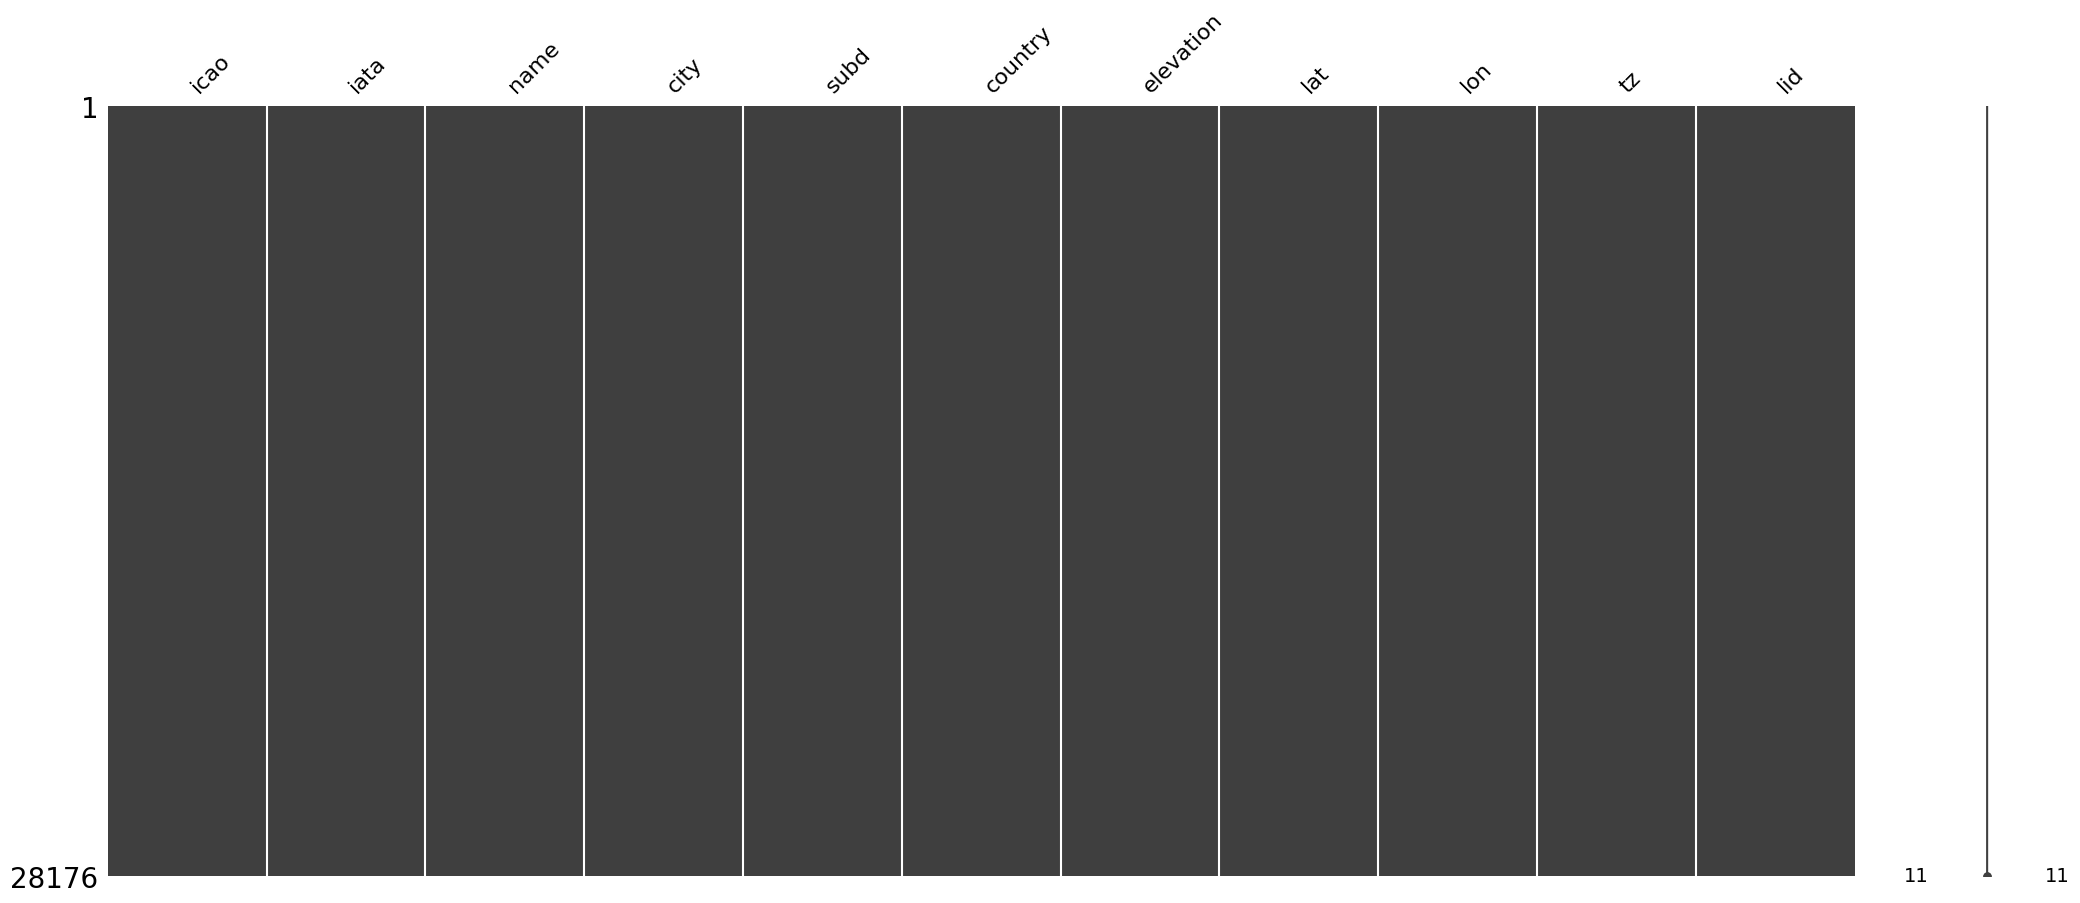

In [32]:
import missingno as msno
msno.matrix(df_air_transs)
# msno.matrix(df)


In [144]:
'''import pandas as pd
import plotly.express as px

# Assuming df is your loaded DataFrame with airport data

# Categorize 'elevation' for the sake of demonstration
# Define your elevation categories (these thresholds are just examples)
low_threshold = 100  # Elevation below this value is considered 'low'
high_threshold = 2000  # Elevation above this value is considered 'high'

# Function to categorize elevation
def categorize_elevation(elevation):
    if elevation < low_threshold:
        return 'Low'
    elif elevation > high_threshold:
        return 'High'
    else:
        return 'Medium'

# Apply the categorization
df_air_transs['elevation_category'] = df_air_transs['elevation'].apply(categorize_elevation)
df_air_transs['elevation_category'] = pd.Categorical(df_air_transs['elevation_category'], categories=['Low', 'Medium', 'High'])

# Create the figure
fig = px.scatter_mapbox(df_air_transs, lat="lat", lon="lon", hover_name="name", hover_data=["city", "subd", "country", "elevation"],
                        color="elevation_category", color_discrete_map={'Low': "blue", 'Medium': "yellow", 'High': "red"},
                        zoom=3, height=400)

# Update layout to a simple map style
fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "OpenStreetMap",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSTopo/MapServer/tile/{z}/{y}/{x}"
            ]
        }
    ])
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Show the figure
fig.show()'''


'import pandas as pd\nimport plotly.express as px\n\n# Assuming df is your loaded DataFrame with airport data\n\n# Categorize \'elevation\' for the sake of demonstration\n# Define your elevation categories (these thresholds are just examples)\nlow_threshold = 100  # Elevation below this value is considered \'low\'\nhigh_threshold = 2000  # Elevation above this value is considered \'high\'\n\n# Function to categorize elevation\ndef categorize_elevation(elevation):\n    if elevation < low_threshold:\n        return \'Low\'\n    elif elevation > high_threshold:\n        return \'High\'\n    else:\n        return \'Medium\'\n\n# Apply the categorization\ndf_air_transs[\'elevation_category\'] = df_air_transs[\'elevation\'].apply(categorize_elevation)\ndf_air_transs[\'elevation_category\'] = pd.Categorical(df_air_transs[\'elevation_category\'], categories=[\'Low\', \'Medium\', \'High\'])\n\n# Create the figure\nfig = px.scatter_mapbox(df_air_transs, lat="lat", lon="lon", hover_name="name", h

# Dropping id columns of the training data and merge with the table from the Airport

In [33]:
df1_train = df1.copy()
df1_train.drop('ID', axis =1, inplace = True)
df1_train

,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0
...,...,...,...,...,...,...,...,...,...
107828,2018-07-05,WKL 0000,TUN,TUN,2018-07-05 23:00:00,2018-07-06 02.00.00,SCH,TU 32AIML,0.0
107829,2018-01-13,UG 0003,DJE,TUN,2018-01-13 08:00:00,2018-01-13 09.00.00,SCH,UG AT7AT7,0.0
107830,2018-11-07,SGT 0000,TUN,TUN,2018-11-07 05:00:00,2018-11-07 12.50.00,SCH,TU 736IOK,0.0
107831,2018-01-23,UG 0010,TUN,DJE,2018-01-23 18:00:00,2018-01-23 18.45.00,ATA,TU CR9ISA,0.0


In [34]:
print(df1_train.columns)

Index(['DATOP', 'FLTID', 'DEPSTN', 'ARRSTN', 'STD', 'STA', 'STATUS', 'AC',
       'target'],
      dtype='object')


In [35]:
# Selecting required columns from airports_df1
selected_airports_df = df_air_transs[['lat', 'lon', 'iata']]

# Merge for departure airport details
df1_train1 = df1_train.merge(selected_airports_df.rename(columns={'lat': 'dep_lat', 'lon': 'dep_lon'}),
              left_on='DEPSTN', right_on='iata', how='left')

# Merge for arrival airport details
df2_train = df1_train1.merge(selected_airports_df.rename(columns={'lat': 'arr_lat', 'lon': 'arr_lon'}),
              left_on='ARRSTN', right_on='iata', how='left')

# Drop the redundant 'iata' columns
#df.drop(['iata_x', 'iata_y'], axis=1, inplace=True)

# Optionally, drop other redundant columns if necessary
# df.drop(['DEPSTN_x', 'ARRSTN_x', 'DEPSTN_y', 'ARRSTN_y'], axis=1, inplace=True)

# Display the updated DataFrame
df2_train.drop(['iata_x', 'iata_y'], axis=1, inplace=True)
df2_train

,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,dep_lat,dep_lon,arr_lat,arr_lon
0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0,33.3675,-7.58997,36.851002,10.2272
1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0,45.6306,8.72811,36.851002,10.2272
2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0,36.851002,10.2272,41.275333,28.752
3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0,33.875,10.7755,47.153198,-1.61073
4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0,36.851002,10.2272,36.691002,3.21541
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107828,2018-07-05,WKL 0000,TUN,TUN,2018-07-05 23:00:00,2018-07-06 02.00.00,SCH,TU 32AIML,0.0,36.851002,10.2272,36.851002,10.2272
107829,2018-01-13,UG 0003,DJE,TUN,2018-01-13 08:00:00,2018-01-13 09.00.00,SCH,UG AT7AT7,0.0,33.875,10.7755,36.851002,10.2272
107830,2018-11-07,SGT 0000,TUN,TUN,2018-11-07 05:00:00,2018-11-07 12.50.00,SCH,TU 736IOK,0.0,36.851002,10.2272,36.851002,10.2272
107831,2018-01-23,UG 0010,TUN,DJE,2018-01-23 18:00:00,2018-01-23 18.45.00,ATA,TU CR9ISA,0.0,36.851002,10.2272,33.875,10.7755


In [36]:
df2_train.columns
df3= df2_train.copy()

In [37]:
# Convert DATOP column to datetime format
df3['DATOP'] = pd.to_datetime(df3['DATOP'])

# Extract year, month, day, and week
df3['Year'] = df3['DATOP'].dt.year
df3['Month'] = df3['DATOP'].dt.month
df3['Day'] = df3['DATOP'].dt.day
df3['Weekday'] = df3['DATOP'].dt.dayofweek  # Monday=0, Sunday=6

# Reorder columns
#df = df[['FLTID','DATOP', 'Year', 'Month', 'Day', 'Weekday', 'DEPSTN', 'ARRSTN', 'STD', 'STA', 'STATUS', 'AC', 'target']]


df3

,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,dep_lat,dep_lon,arr_lat,arr_lon,Year,Month,Day,Weekday
0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0,33.3675,-7.58997,36.851002,10.2272,2016,1,3,6
1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0,45.6306,8.72811,36.851002,10.2272,2016,1,13,2
2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0,36.851002,10.2272,41.275333,28.752,2016,1,16,5
3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0,33.875,10.7755,47.153198,-1.61073,2016,1,17,6
4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0,36.851002,10.2272,36.691002,3.21541,2016,1,17,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107828,2018-07-05,WKL 0000,TUN,TUN,2018-07-05 23:00:00,2018-07-06 02.00.00,SCH,TU 32AIML,0.0,36.851002,10.2272,36.851002,10.2272,2018,7,5,3
107829,2018-01-13,UG 0003,DJE,TUN,2018-01-13 08:00:00,2018-01-13 09.00.00,SCH,UG AT7AT7,0.0,33.875,10.7755,36.851002,10.2272,2018,1,13,5
107830,2018-11-07,SGT 0000,TUN,TUN,2018-11-07 05:00:00,2018-11-07 12.50.00,SCH,TU 736IOK,0.0,36.851002,10.2272,36.851002,10.2272,2018,11,7,2
107831,2018-01-23,UG 0010,TUN,DJE,2018-01-23 18:00:00,2018-01-23 18.45.00,ATA,TU CR9ISA,0.0,36.851002,10.2272,33.875,10.7755,2018,1,23,1


In [38]:
# Convert STD and STA columns to datetime objects with correct format
df3['STD'] = pd.to_datetime(df3['STD'], format='%Y-%m-%d %H:%M:%S')
df3['STA'] = pd.to_datetime(df3['STA'], format='%Y-%m-%d %H.%M.%S')

# Calculate flight duration in minutes
df3['Flight_Duration'] = (df3['STA'] - df3['STD']).dt.total_seconds() / 60

df3.head()

,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,dep_lat,dep_lon,arr_lat,arr_lon,Year,Month,Day,Weekday,Flight_Duration
0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,260.0,33.3675,-7.58997,36.851002,10.2272,2016,1,3,6,145.0
1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO,20.0,45.6306,8.72811,36.851002,10.2272,2016,1,13,2,110.0
2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,ATA,TU 32AIMN,0.0,36.851002,10.2272,41.275333,28.752,2016,1,16,5,155.0
3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,ATA,TU 736IOK,0.0,33.875,10.7755,47.153198,-1.61073,2016,1,17,6,170.0
4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15:50:00,ATA,TU 320IMU,22.0,36.851002,10.2272,36.691002,3.21541,2016,1,17,6,80.0


In [39]:
#save the code



In [40]:
#drop the column of the DATOP and 
df3['STD_Date'] = pd.to_datetime(df3['STD']).dt.date
df3['STD_Time'] = pd.to_datetime(df3['STD']).dt.time

# Split STA column into date and time columns
df3['STA_Date'] = pd.to_datetime(df3['STA']).dt.date
df3['STA_Time'] = pd.to_datetime(df3['STA']).dt.time

# Drop the original STD and STA columns
df3.drop(columns=['STD', 'STA'], inplace=True)

df3

,DATOP,FLTID,DEPSTN,ARRSTN,STATUS,AC,target,dep_lat,dep_lon,arr_lat,arr_lon,Year,Month,Day,Weekday,Flight_Duration,STD_Date,STD_Time,STA_Date,STA_Time
0,2016-01-03,TU 0712,CMN,TUN,ATA,TU 32AIMN,260.0,33.3675,-7.58997,36.851002,10.2272,2016,1,3,6,145.0,2016-01-03,10:30:00,2016-01-03,12:55:00
1,2016-01-13,TU 0757,MXP,TUN,ATA,TU 31BIMO,20.0,45.6306,8.72811,36.851002,10.2272,2016,1,13,2,110.0,2016-01-13,15:05:00,2016-01-13,16:55:00
2,2016-01-16,TU 0214,TUN,IST,ATA,TU 32AIMN,0.0,36.851002,10.2272,41.275333,28.752,2016,1,16,5,155.0,2016-01-16,04:10:00,2016-01-16,06:45:00
3,2016-01-17,TU 0480,DJE,NTE,ATA,TU 736IOK,0.0,33.875,10.7755,47.153198,-1.61073,2016,1,17,6,170.0,2016-01-17,14:10:00,2016-01-17,17:00:00
4,2016-01-17,TU 0338,TUN,ALG,ATA,TU 320IMU,22.0,36.851002,10.2272,36.691002,3.21541,2016,1,17,6,80.0,2016-01-17,14:30:00,2016-01-17,15:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107828,2018-07-05,WKL 0000,TUN,TUN,SCH,TU 32AIML,0.0,36.851002,10.2272,36.851002,10.2272,2018,7,5,3,180.0,2018-07-05,23:00:00,2018-07-06,02:00:00
107829,2018-01-13,UG 0003,DJE,TUN,SCH,UG AT7AT7,0.0,33.875,10.7755,36.851002,10.2272,2018,1,13,5,60.0,2018-01-13,08:00:00,2018-01-13,09:00:00
107830,2018-11-07,SGT 0000,TUN,TUN,SCH,TU 736IOK,0.0,36.851002,10.2272,36.851002,10.2272,2018,11,7,2,470.0,2018-11-07,05:00:00,2018-11-07,12:50:00
107831,2018-01-23,UG 0010,TUN,DJE,ATA,TU CR9ISA,0.0,36.851002,10.2272,33.875,10.7755,2018,1,23,1,45.0,2018-01-23,18:00:00,2018-01-23,18:45:00


In [41]:
df4 = df3.copy()
df4

,DATOP,FLTID,DEPSTN,ARRSTN,STATUS,AC,target,dep_lat,dep_lon,arr_lat,arr_lon,Year,Month,Day,Weekday,Flight_Duration,STD_Date,STD_Time,STA_Date,STA_Time
0,2016-01-03,TU 0712,CMN,TUN,ATA,TU 32AIMN,260.0,33.3675,-7.58997,36.851002,10.2272,2016,1,3,6,145.0,2016-01-03,10:30:00,2016-01-03,12:55:00
1,2016-01-13,TU 0757,MXP,TUN,ATA,TU 31BIMO,20.0,45.6306,8.72811,36.851002,10.2272,2016,1,13,2,110.0,2016-01-13,15:05:00,2016-01-13,16:55:00
2,2016-01-16,TU 0214,TUN,IST,ATA,TU 32AIMN,0.0,36.851002,10.2272,41.275333,28.752,2016,1,16,5,155.0,2016-01-16,04:10:00,2016-01-16,06:45:00
3,2016-01-17,TU 0480,DJE,NTE,ATA,TU 736IOK,0.0,33.875,10.7755,47.153198,-1.61073,2016,1,17,6,170.0,2016-01-17,14:10:00,2016-01-17,17:00:00
4,2016-01-17,TU 0338,TUN,ALG,ATA,TU 320IMU,22.0,36.851002,10.2272,36.691002,3.21541,2016,1,17,6,80.0,2016-01-17,14:30:00,2016-01-17,15:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107828,2018-07-05,WKL 0000,TUN,TUN,SCH,TU 32AIML,0.0,36.851002,10.2272,36.851002,10.2272,2018,7,5,3,180.0,2018-07-05,23:00:00,2018-07-06,02:00:00
107829,2018-01-13,UG 0003,DJE,TUN,SCH,UG AT7AT7,0.0,33.875,10.7755,36.851002,10.2272,2018,1,13,5,60.0,2018-01-13,08:00:00,2018-01-13,09:00:00
107830,2018-11-07,SGT 0000,TUN,TUN,SCH,TU 736IOK,0.0,36.851002,10.2272,36.851002,10.2272,2018,11,7,2,470.0,2018-11-07,05:00:00,2018-11-07,12:50:00
107831,2018-01-23,UG 0010,TUN,DJE,ATA,TU CR9ISA,0.0,36.851002,10.2272,33.875,10.7755,2018,1,23,1,45.0,2018-01-23,18:00:00,2018-01-23,18:45:00


In [65]:
df4 = df3.drop(['DATOP', 'FLTID', 'DEPSTN', 'ARRSTN', 'Year', 'AC',  'STD_Date', 'STD_Time', 'STA_Date',
       'STA_Time'], axis =1)
df4

,STATUS,target,dep_lat,dep_lon,arr_lat,arr_lon,Month,Day,Weekday,Flight_Duration
0,ATA,260.0,33.3675,-7.58997,36.851002,10.2272,1,3,6,145.0
1,ATA,20.0,45.6306,8.72811,36.851002,10.2272,1,13,2,110.0
2,ATA,0.0,36.851002,10.2272,41.275333,28.752,1,16,5,155.0
3,ATA,0.0,33.875,10.7755,47.153198,-1.61073,1,17,6,170.0
4,ATA,22.0,36.851002,10.2272,36.691002,3.21541,1,17,6,80.0
...,...,...,...,...,...,...,...,...,...,...
107828,SCH,0.0,36.851002,10.2272,36.851002,10.2272,7,5,3,180.0
107829,SCH,0.0,33.875,10.7755,36.851002,10.2272,1,13,5,60.0
107830,SCH,0.0,36.851002,10.2272,36.851002,10.2272,11,7,2,470.0
107831,ATA,0.0,36.851002,10.2272,33.875,10.7755,1,23,1,45.0


In [64]:
df4.columns

Index(['STATUS', 'target', 'dep_lat', 'dep_lon', 'arr_lat', 'arr_lon', 'Month',
       'Day', 'Weekday', 'Flight_Duration'],
      dtype='object')

In [66]:
df4.columns = [col.lower().replace(' ', '_') for col in df4.columns]

df4.head()

,status,target,dep_lat,dep_lon,arr_lat,arr_lon,month,day,weekday,flight_duration
0,ATA,260.0,33.3675,-7.58997,36.851002,10.2272,1,3,6,145.0
1,ATA,20.0,45.6306,8.72811,36.851002,10.2272,1,13,2,110.0
2,ATA,0.0,36.851002,10.2272,41.275333,28.752,1,16,5,155.0
3,ATA,0.0,33.875,10.7755,47.153198,-1.61073,1,17,6,170.0
4,ATA,22.0,36.851002,10.2272,36.691002,3.21541,1,17,6,80.0


In [71]:
# Initial mapping dictionary
status_mapping = {'ATA': 0, 'DEP': 1, 'RTR': 2, 'SCH': 3, 'DEL': 4}

# Find unique values in the 'STATUS' column
unique_status = df4['status'].unique()

# Identify which statuses were not included in the mapping
unmapped_statuses = [status for status in unique_status if status not in status_mapping]

# Update the dictionary to include the new statuses (if any)
# Assigning new unique numbers sequentially starting from the last number + 1
next_index = max(status_mapping.values()) + 1
for status in unmapped_statuses:
    status_mapping[status] = next_index
    next_index += 1

# Reapply the mapping with the updated dictionary
df4['status'] = df4['status'].map(status_mapping)

# Optionally, handle NaN values by filling them with a default value (e.g., -1 for unknown)
# Uncomment the line below if you want to apply this
# df5['STATUS'] = df5['STATUS'].fillna(-1)

# Print the unique values in the 'STATUS' column after remapping
print(df4['status'].unique())

[0 1 2 3 4]


In [72]:
# Print correlation of variables
df4[['status', 'target', 'dep_lat','dep_lon','arr_lat','arr_lon','month','day','weekday','flight_duration']].corr()


,status,target,dep_lat,dep_lon,arr_lat,arr_lon,month,day,weekday,flight_duration
status,1.000000,-0.155119,-1.114093e-01,0.070138,-0.109329,0.068216,-0.027211,-4.893283e-03,-0.051412,0.042618
target,-0.155119,1.000000,-5.951891e-03,-0.010315,-0.024523,0.006347,0.020645,5.620904e-03,0.038514,-0.006306
dep_lat,-0.111409,-0.005952,1.000000e+00,-0.068579,0.063682,0.131513,0.027856,4.922807e-07,0.036361,-0.005262
dep_lon,0.070138,-0.010315,-6.857938e-02,1.000000,0.136240,0.046430,-0.037221,2.281884e-03,-0.009865,0.003190
arr_lat,-0.109329,-0.024523,6.368242e-02,0.136240,1.000000,-0.068888,0.027755,-1.061497e-05,0.009473,-0.005133
arr_lon,0.068216,0.006347,1.315128e-01,0.046430,-0.068888,1.000000,-0.036934,1.233484e-03,-0.027153,0.002052
month,-0.027211,0.020645,2.785557e-02,-0.037221,0.027755,-0.036934,1.000000,9.412400e-03,0.005972,-0.000419
day,-0.004893,0.005621,4.922807e-07,0.002282,-0.000011,0.001233,0.009412,1.000000e+00,-0.009119,0.005154
weekday,-0.051412,0.038514,3.636072e-02,-0.009865,0.009473,-0.027153,0.005972,-9.119397e-03,1.000000,-0.002317
flight_duration,0.042618,-0.006306,-5.261953e-03,0.003190,-0.005133,0.002052,-0.000419,5.153789e-03,-0.002317,1.000000


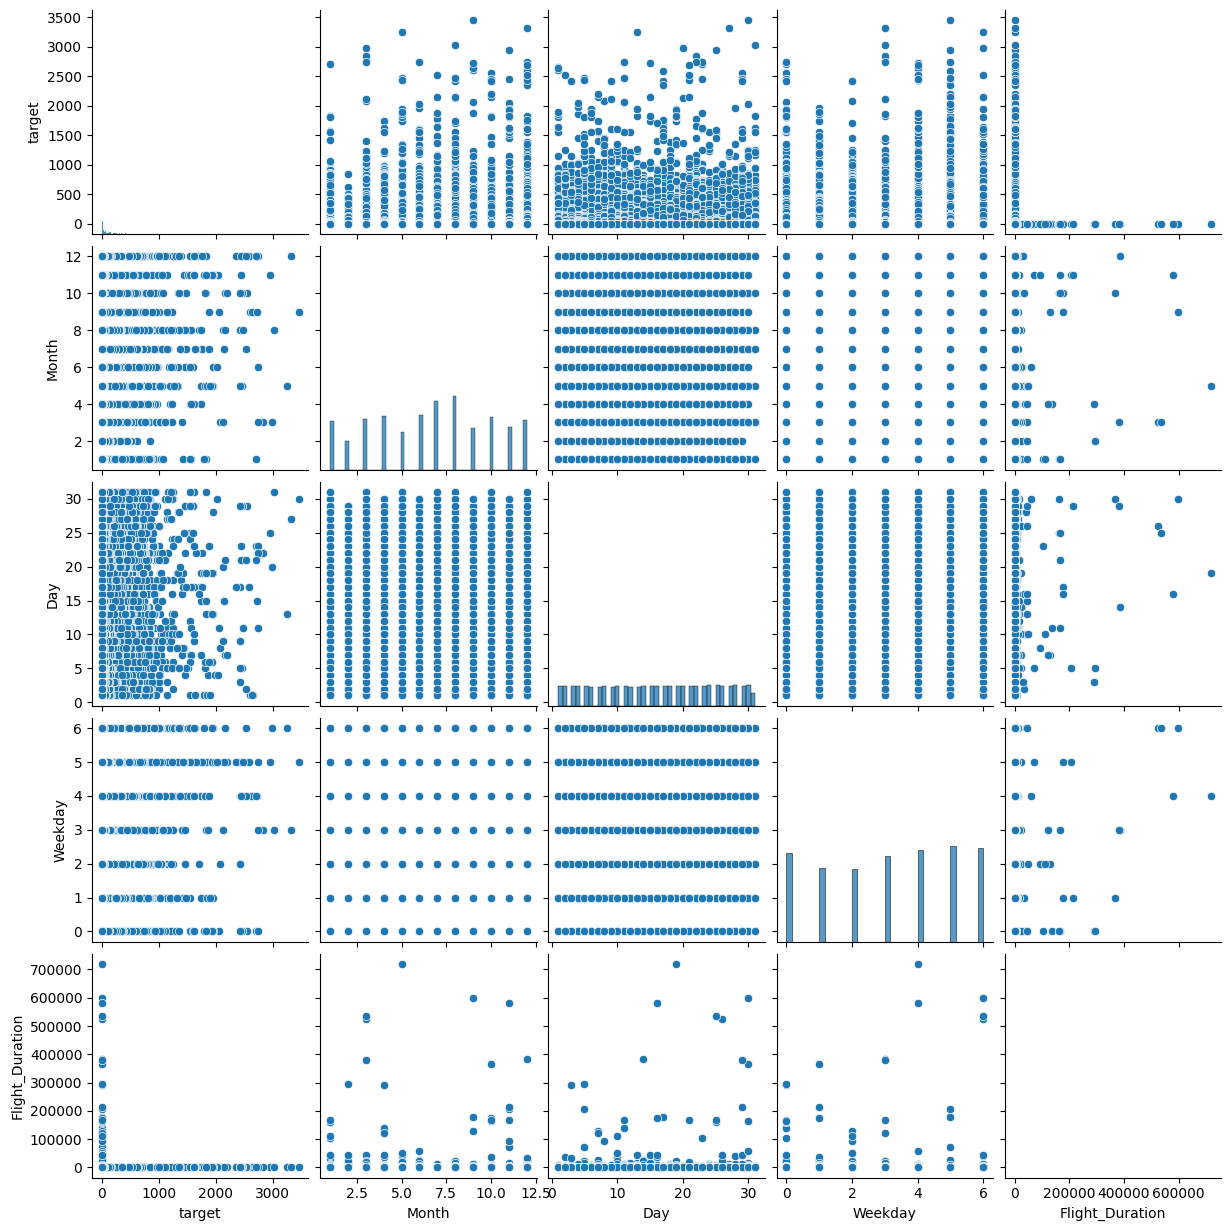

In [29]:
#sns.pairplot(df4[['target', 'Month','Day', 'Weekday', 'Flight_Duration']])

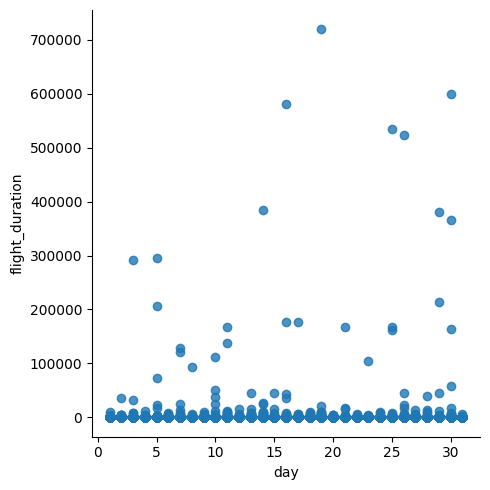

In [73]:
sns.lmplot(x='day', y='flight_duration', data=df4, ci=None)

<Axes: >

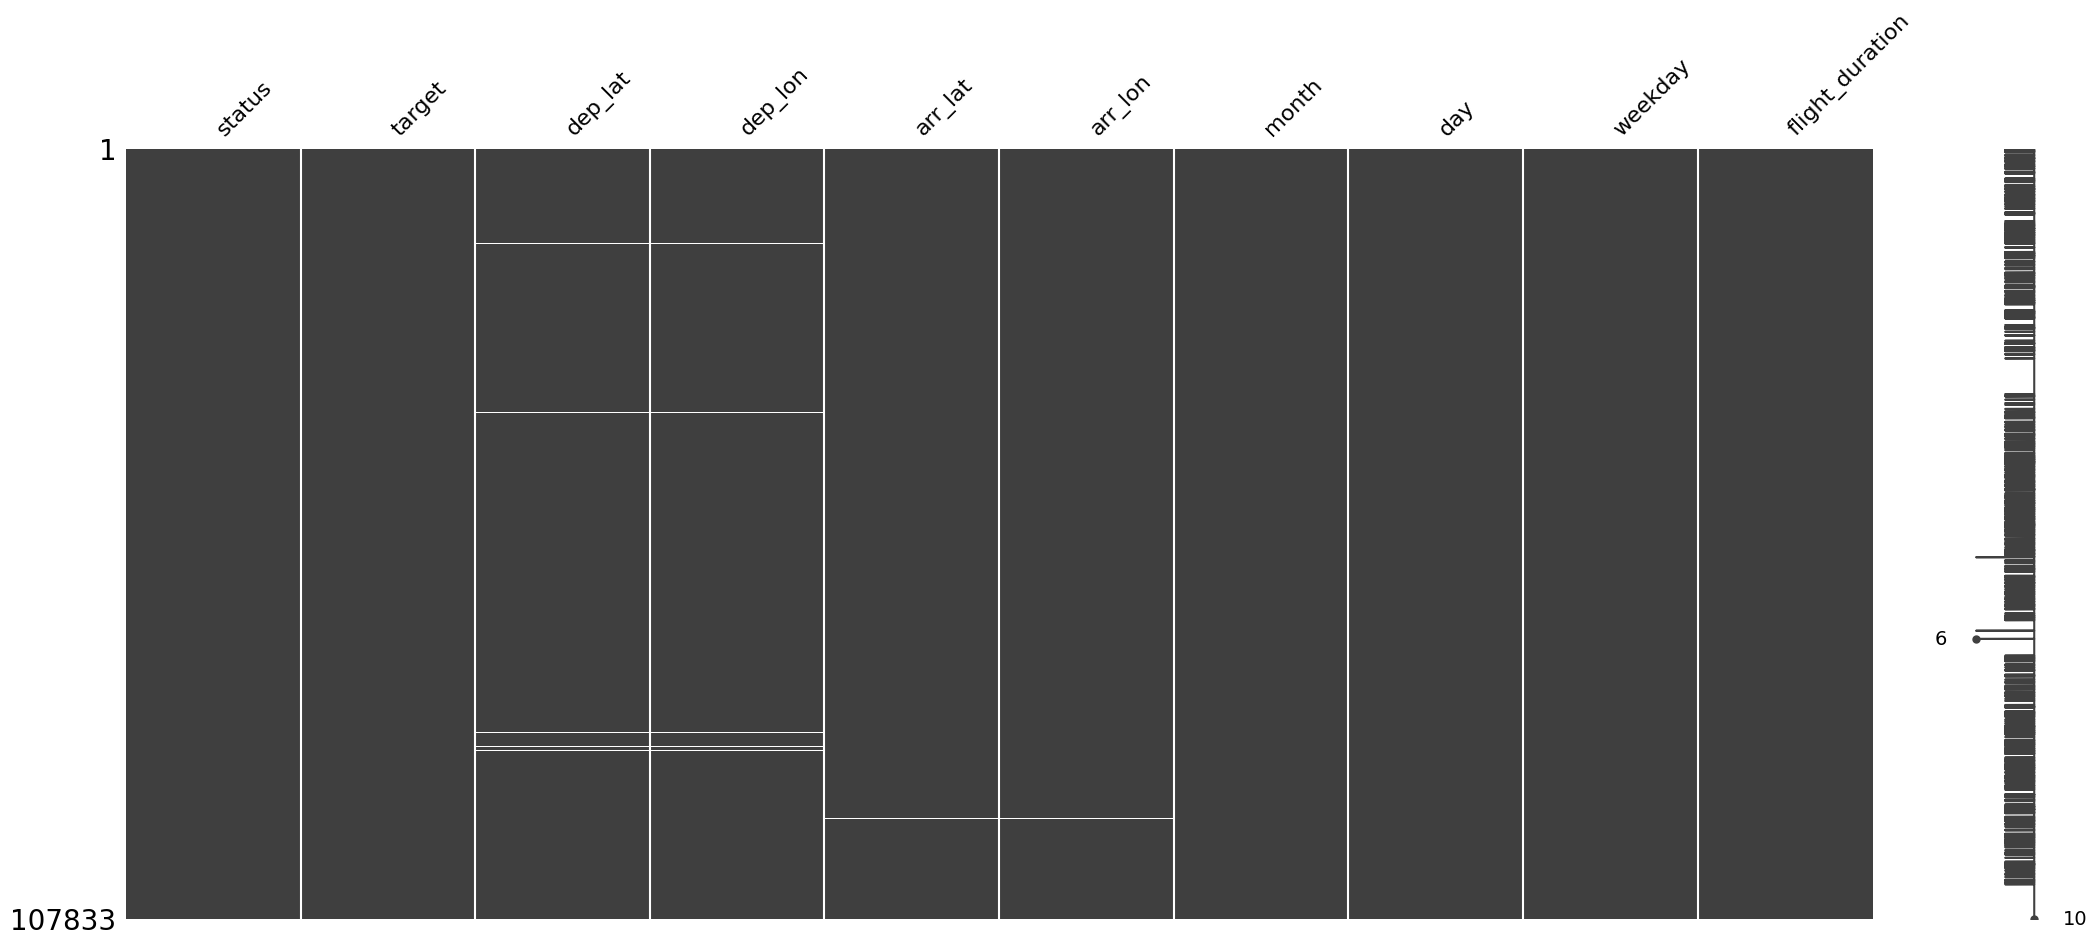

In [74]:
msno.matrix(df4)

In [75]:
df4.isnull().sum()

status               0
target               0
dep_lat            332
dep_lon            332
arr_lat            332
arr_lon            332
month                0
day                  0
weekday              0
flight_duration      0
dtype: int64

Text(0.5, 0, 'target')

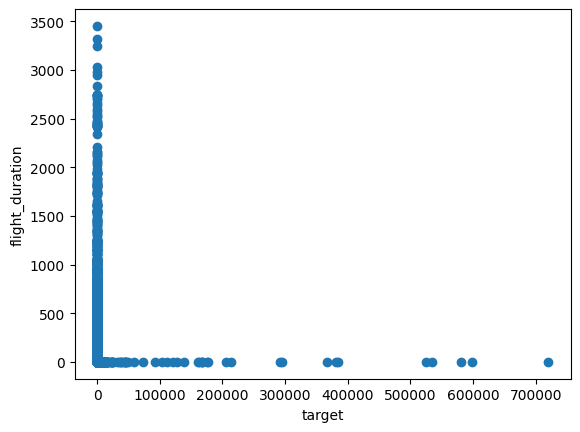

In [76]:
plt.scatter(df4.flight_duration, df4.target)
plt.ylabel('flight_duration')
plt.xlabel('target')

In [77]:
df5 = df4.dropna(subset=['dep_lat'	,'dep_lon'	,'arr_lat'	,'arr_lon'])

In [85]:
X = df5[['dep_lat'	,'dep_lon'	,'arr_lat'	,'arr_lon'	,'month'	,'day'	,'weekday'	,'flight_duration']]  # X needs to be 2-dimensional so we need double brackets here
y = df5['target']

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [82]:
label_encoder = LabelEncoder()
categorical_cols = ['depstn', 'arrstin', 'status', 'ac']

### get rid off the outlier

In [168]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [173]:
from scipy import stats

# Assuming df5 is your DataFrame
# Select only the numeric columns for z-score computation
numeric_cols = df5.select_dtypes(include=[np.number])

# Calculate z-scores for these columns
z_scores = stats.zscore(numeric_cols)

# Create a mask for rows with any z-scores greater than the threshold
threshold = 3
outlier_mask = (np.abs(z_scores) > threshold).any(axis=1)

# Apply the mask to the original DataFrame to exclude outliers
df6 = df5[~outlier_mask]

# Optionally, reset the index of the new DataFrame
df6.reset_index(drop=True, inplace=True)

df6


,STATUS,target,dep_lat,dep_lon,arr_lat,arr_lon,Month,Day,Weekday,Flight_Duration
0,0,260.0,33.3675,-7.58997,36.851002,10.2272,1,3,6,145.0
1,0,20.0,45.6306,8.72811,36.851002,10.2272,1,13,2,110.0
2,0,0.0,36.851002,10.2272,41.275333,28.752,1,16,5,155.0
3,0,0.0,33.875,10.7755,47.153198,-1.61073,1,17,6,170.0
4,0,22.0,36.851002,10.2272,36.691002,3.21541,1,17,6,80.0
...,...,...,...,...,...,...,...,...,...,...
105008,3,0.0,36.851002,10.2272,36.851002,10.2272,7,5,3,180.0
105009,3,0.0,33.875,10.7755,36.851002,10.2272,1,13,5,60.0
105010,3,0.0,36.851002,10.2272,36.851002,10.2272,11,7,2,470.0
105011,0,0.0,36.851002,10.2272,33.875,10.7755,1,23,1,45.0


## Feature Engineering

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [174]:
X = df6[['dep_lat'	,'dep_lon'	,'arr_lat'	,'arr_lon'	,'Month'	,'Day'	,'Weekday'	,'Flight_Duration']]  # X needs to be 2-dimensional so we need double brackets here
y = df6['target']

In [89]:
# Initialize the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

mae, rmse

(55.94344915191431, 118.26769521931053)

In [175]:
RSEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RSEED) #Careful here: this is an unusual choice for the test_size. 
                                                                                            #See paragraph below for more explainations.
# initialize and train model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# predict on test-set
y_pred_lin = lin_reg.predict(X_test)
y_pred_train = lin_reg.predict(X_train)

# RMSE on train and test set
print("Train RMSE:", round(np.sqrt(mean_squared_error(y_train, y_pred_train)), 3))
print("Test RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred_lin)), 3))

Train RMSE: 63.541
Test RMSE: 64.384


In [90]:
# Split data into training and testing sets again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor again
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

mae, rmse

(55.94344915191431, 118.26769521931053)

In [108]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

# Assuming X_train and y_train are defined
# X_train, y_train = ...

# Define the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=10000))  # Increase max_iter for convergence
])

# Define the parameter grid
param_grid = {
    'model__C': np.logspace(-4, 4, 20),  # Wider range and more options
    'model__penalty': ['l2', 'none'],  # Using 'none' for no regularization
    # Specify the solver if including 'l1' or 'elasticnet' penalties
    # 'model__solver': ['saga']  # 'saga' solver supports all penalties
}

# Define RandomizedSearchCV
random_search = RandomizedSearchCV(
    pipe,
    param_distributions=param_grid,
    n_iter=5,  # Number of parameter settings that are sampled
    cv=3,  # Number of folds in cross-validator
    n_jobs=-1,  # Use all processors
    scoring=make_scorer(mean_squared_error, greater_is_better=False),  # Customize scoring if necessary
    random_state=42  # For reproducible results
)

# Fit the model
random_search.fit(X_train, y_train)

# Results
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best parameters found: ", best_params)
print("Best score found: ", best_score)


/Users/modilafta/Jalape-o/smf_airlines-/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/modilafta/Jalape-o/smf_airlines-/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/modilafta/Jalape-o/smf_airlines-/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/modilafta/Jalape-o/smf_airlines-/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/modilafta/Jalape-o/smf_airlines-/.venv/lib/py

Best parameters found:  {'model__penalty': 'l2', 'model__C': 0.0006951927961775605}
Best score found:  -16131.874476597033


In [ ]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(211)  # number of rows, number of columns, number of the actual plot in the grid
sns.histplot(data=df, x='age', ax=ax, hue='class', multiple='stack')
ax.set_title('Recurrence per age group', fontsize=15)
ax.set_ylabel('Number of samples [#]', fontsize=10)
ax.set_xlabel('Age group [years]')
ax.legend(labels=['no', 'yes'], title='Recurrence', loc=2)
ax2 = fig.add_subplot(212)
sns.histplot(data=df, x='nodes', ax=ax2, hue='class', multiple='stack')
plt.show()  # only needed outside jupyter notebook
plt.savefig('my_figure.pdf')  # export the figure

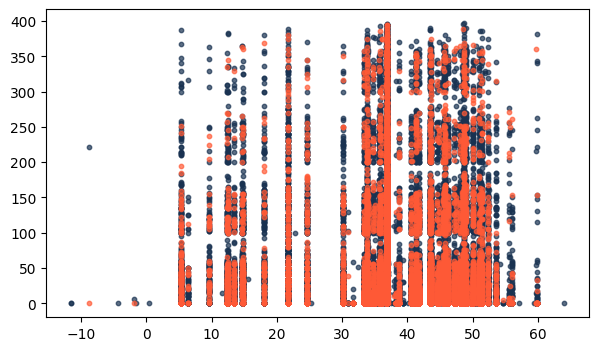

In [176]:
plt.scatter(X_train.iloc[:, 0], y_train, s=10, c="#193251", alpha=0.7, label="Train data")
plt.scatter(X_test.iloc[:, 0], y_test, s=10, c="#FF5A36", alpha=0.7, label="Test data")

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RSEED)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (84010, 8)
X_test shape: (21003, 8)
y_train shape: (84010,)
y_test shape: (21003,)


In [179]:
intercept = lin_reg.intercept_
coefficients = lin_reg.coef_
print("Intercept:", intercept.round(4))
print("Coefficients:", coefficients.round(4))

Intercept: 41.5263
Coefficients: [ 0.0315 -0.1089 -0.2939 -0.0544  0.3473  0.0606  1.4708 -0.0024]


In [181]:
# Specify the columns with missing values (latitude and longitude)
missing_cols = ['dep_lat', 'dep_lon', 'arr_lat', 'arr_lon']

# Create a ColumnTransformer to apply imputation only to specified columns
trf1 = ColumnTransformer(transformers=[
    ('impute_cols', SimpleImputer(strategy='most_frequent'), missing_cols)],
     remainder='passthrough')

In [182]:

from sklearn.preprocessing import StandardScaler

# Define the transformer to apply StandardScaler to all numeric columns
trf2 = ColumnTransformer([
    ('scale_cols', StandardScaler(), slice(0, -1))  # Apply StandardScaler to all numeric columns
])

In [92]:

model = LinearRegression(n_jobs=-1)
model.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [99]:
y_pred = model.predict(X_test)

In [101]:
r2 = r2_score(y_test, y_pred)
print ('R2 =',r2)
mse = mean_squared_error(y_test, y_pred)
print ('MSE =', mse)

R2 = 0.0029238825246568068
MSE = 12879.645662998691


In [98]:
y_hat = lin_reg.predict(X)
print("R-squared:", r2_score(y, y_hat).round(5))

NameError: name 'lin_reg' is not defined

In [97]:
len(df4['target'])

107833

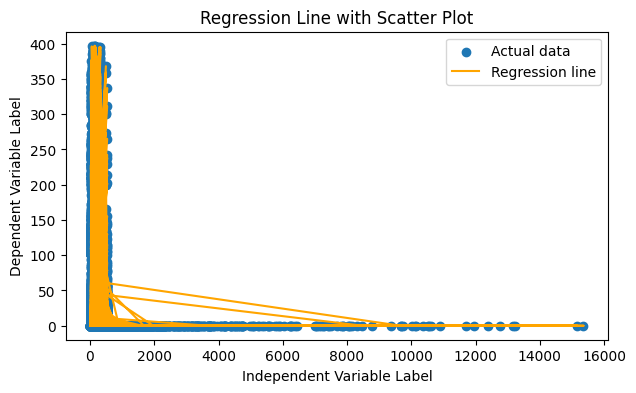

In [210]:
# Plot data with regression line
plt.scatter(df6['Flight_Duration'], y, label='Actual data')
plt.plot(df6['Flight_Duration'], y, color='orange', label='Regression line')
plt.xlabel('Independent Variable Label')
plt.ylabel('Dependent Variable Label')
plt.title('Regression Line with Scatter Plot')
plt.legend()
plt.show()

In [109]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

# Generate a synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=10, n_targets=1, noise=0.1, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize KNN regressor
knn_reg = KNeighborsRegressor(n_neighbors=5)

# Fit the model
knn_reg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = knn_reg.predict(X_test_scaled)

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 3741.0272759087325


In [112]:
model = LinearRegression(n_jobs=-1) #there is no hyper paramter 
model.fit(X_train, y_train)

# Calculating R-squared using the test set
r_squared = model.score(X_test, y_test)

# Define the adjusted_r_squared function
def adjusted_r_squared(r_squared, X):
    n = len(X)  # Number of samples
    p = X.shape[1]  # Number of features
    adjusted_r2 = 1 - ((1 - r_squared) * (n - 1) / (n - p - 1))
    return adjusted_r2

# Calculating adjusted R-squared
adjusted_r2 = adjusted_r_squared(r_squared, X_test)
print(f"R-squared: {r_squared}")
print(f"Adjusted R-squared: {adjusted_r2}")

R-squared: 0.9999994362016347
Adjusted R-squared: 0.9999994063710334
